# Importing Important Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r'C:\Users\acer\Desktop\Internship\Project\rating\rating.csv')
df.head()

,Stars,Comments
0,Stars,Comments
1,5,I have a gamming PC so was not looking for som...
2,5,Got this laptop to use with my cricut. So far ...
3,5,"I have the i3 processor, which you would think..."
4,5,I bought it for my son it plays his games fine.


In [3]:
df.shape

(26114, 2)

In [4]:
df.nunique()

Stars           6
Comments    17070
dtype: int64

In [5]:
df.Stars.value_counts()

5        7285
1        5409
4        5105
3        4362
2        3598
Stars     355
Name: Stars, dtype: int64

#### Deleting Rows With Stars And Comments written

we can see many rows have data as Stars and Comments which we are going to delete.

In [6]:
temp=0
for i in df.Stars:
    if i=="Stars":
        df.drop(index=temp,inplace=True)
    temp+=1

In [7]:
df.Stars.value_counts()

5    7285
1    5409
4    5105
3    4362
2    3598
Name: Stars, dtype: int64

#### Deleting Null Rows

In [8]:
df.isna().sum()

Stars        0
Comments    19
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Stars       0
Comments    0
dtype: int64

#### Deleting Duplicates

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.Stars.value_counts()

5    4676
1    3597
4    3557
3    2935
2    2402
Name: Stars, dtype: int64

### Creating a new column for length of Comments

In [13]:
df["Old Length"]=df.Comments.str.len()
df.head()

,Stars,Comments,Old Length
1,5,I have a gamming PC so was not looking for som...,1234
2,5,Got this laptop to use with my cricut. So far ...,126
3,5,"I have the i3 processor, which you would think...",614
4,5,I bought it for my son it plays his games fine.,47
5,5,This thing is great. There is no competition f...,440


In [14]:
#converting the Stars Column to int
df["Stars"]=pd.to_numeric(df["Stars"], errors='ignore')

In [15]:
#Converting allthe comments into lower cases
df["Comments"]=df["Comments"].str.lower()
df.head()

,Stars,Comments,Old Length
1,5,i have a gamming pc so was not looking for som...,1234
2,5,got this laptop to use with my cricut. so far ...,126
3,5,"i have the i3 processor, which you would think...",614
4,5,i bought it for my son it plays his games fine.,47
5,5,this thing is great. there is no competition f...,440


#### Basic Cleaning

In [16]:
#Replacing Email address with email
df["Comments"]=df["Comments"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')
#Replacing URL with link
df["Comments"]=df["Comments"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','url')
#Replacing digits with numbers
df["Comments"]=df["Comments"].str.replace(r'\d+(\.\d+)?','number')

In [17]:
#Where not words digits or spaces replace with white space
df["Comments"]=df["Comments"].str.replace(r'[^\w\d\s]',' ')
#Replace white space swith white spaces
df["Comments"]=df["Comments"].str.replace(r'\s+',' ')
#Remove leading and trailing whitespaces
df["Comments"]=df["Comments"].str.replace(r'^\s+|\s+?$','')

In [18]:
df.head()

,Stars,Comments,Old Length
1,5,i have a gamming pc so was not looking for som...,1234
2,5,got this laptop to use with my cricut so far n...,126
3,5,i have the inumber processor which you would t...,614
4,5,i bought it for my son it plays his games fine,47
5,5,this thing is great there is no competition fo...,440


#### Stopwords Removal

In [19]:
# Removing Stopwords
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english") + ['u','ur','4','2','im','ure'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df["Comments"]=df["Comments"].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [21]:
df.head()

,Stars,Comments,Old Length
1,5,gamming pc looking something bunch high end ha...,1234
2,5,got laptop use cricut far problems small lapto...,126
3,5,inumber processor would think would slow thing...,614
4,5,bought son plays games fine,47
5,5,thing great competition quality affordable num...,440


In [22]:
df["New Length"]=df.Comments.str.len()
df.head()

,Stars,Comments,Old Length,New Length
1,5,gamming pc looking something bunch high end ha...,1234,752
2,5,got laptop use cricut far problems small lapto...,126,69
3,5,inumber processor would think would slow thing...,614,363
4,5,bought son plays games fine,47,27
5,5,thing great competition quality affordable num...,440,294


#### Total Length Removal

In [23]:
a=df["Old Length"].sum()
print("Original Length:",a)
b=df["New Length"].sum()
print("Cleaned Length:",b)
print("Percentage Data Left",(b/a)*100)

Original Length: 9675069
Cleaned Length: 6225373
Percentage Data Left 64.34448167759838


#### Distplot

#### Loud Words

In [24]:
from wordcloud import WordCloud

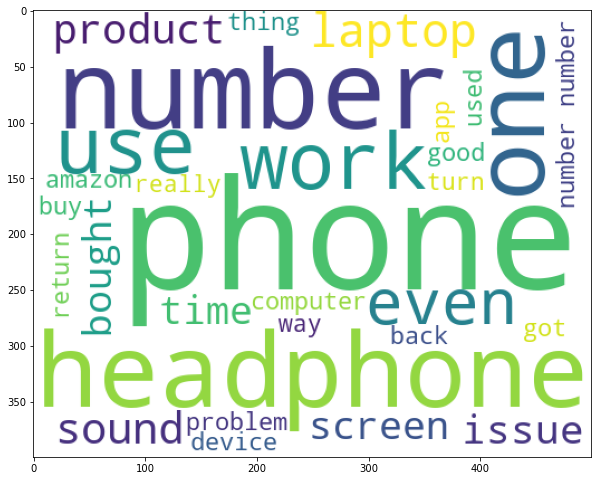

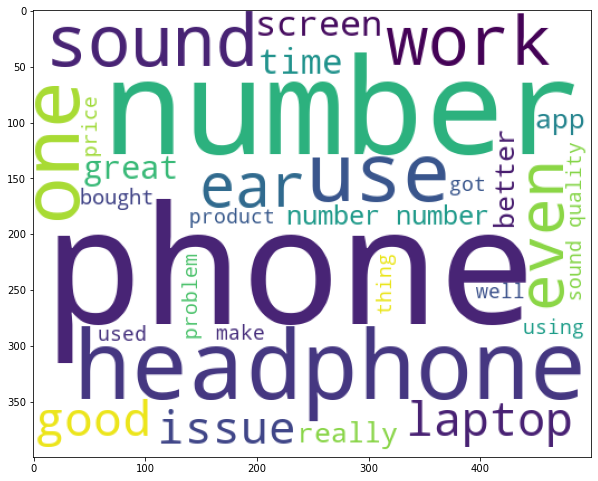

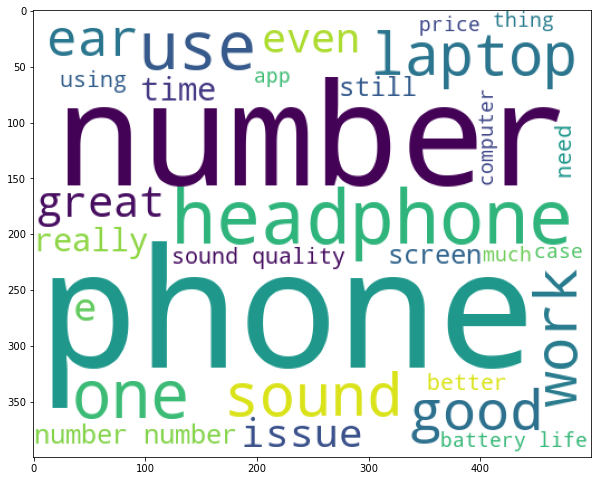

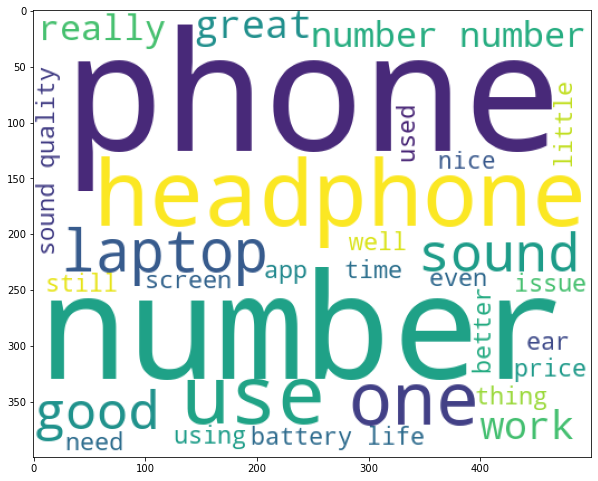

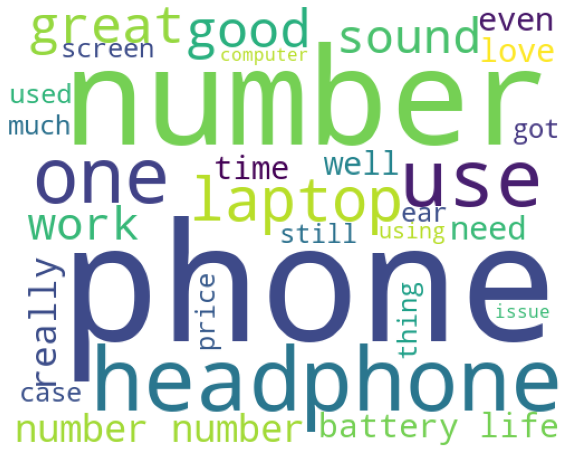

In [25]:
r1=df["Comments"][df["Stars"]==1]
r1_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r1))
plt.figure(figsize=(10,10))
plt.imshow(r1_cloud)

r2=df["Comments"][df["Stars"]==2]
r2_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r2))
plt.figure(figsize=(10,10))
plt.imshow(r2_cloud)

r3=df["Comments"][df["Stars"]==3]
r3_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r3))
plt.figure(figsize=(10,10))
plt.imshow(r3_cloud)

r4=df["Comments"][df["Stars"]==4]
r4_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r4))
plt.figure(figsize=(10,10))
plt.imshow(r4_cloud)

r5=df["Comments"][df["Stars"]==5]
r5_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r5))
plt.figure(figsize=(10,10))
plt.imshow(r5_cloud)

plt.axis('off')
plt.show()

In [26]:
l=['phone','headphone','laptop','amazon','computer']
for i in l:
    df["Comments"]=df["Comments"].str.replace(i,'')

# Vectorisation and model selection

In [27]:
# Convert Word into text using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiating classifiers 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

tf_idf_vec=TfidfVectorizer()
MNB=MultinomialNB()
SVM=SGDClassifier()

feature=tf_idf_vec.fit_transform(df["Comments"])

x=feature
y=df["Stars"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=343)

In [31]:
MNB.fit(X_train,Y_train)
SVM.fit(X_train,Y_train)

SGDClassifier()

In [32]:
y_pred_mnb=MNB.predict(X_test)
print("Accuracy Score MNB:",accuracy_score(Y_test,y_pred_mnb))

y_pred_svm=SVM.predict(X_test)
print("Accuracy Score SVM:",accuracy_score(Y_test,y_pred_svm))

Accuracy Score MNB: 0.3423726619636269
Accuracy Score SVM: 0.3604297456475309


In [33]:
print(classification_report(Y_test,y_pred_mnb))

              precision    recall  f1-score   support

           1       0.71      0.33      0.45      3248
           2       0.00      0.00      0.00      2163
           3       0.33      0.00      0.01      2633
           4       0.26      0.02      0.03      3202
           5       0.30      0.99      0.46      4205

    accuracy                           0.34     15451
   macro avg       0.32      0.27      0.19     15451
weighted avg       0.34      0.34      0.23     15451



In [34]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       0.47      0.48      0.48      3248
           2       0.21      0.17      0.19      2163
           3       0.22      0.22      0.22      2633
           4       0.27      0.25      0.26      3202
           5       0.47      0.54      0.50      4205

    accuracy                           0.36     15451
   macro avg       0.33      0.33      0.33     15451
weighted avg       0.35      0.36      0.35     15451



Text(33.0, 0.5, 'True Labels')

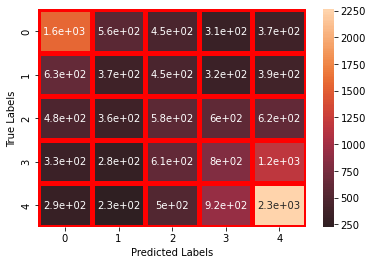

In [36]:
# Confusion matrix
conf_matrx=confusion_matrix(Y_test,y_pred_svm)

ax=plt.subplot()
sn.heatmap(conf_matrx,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')



In [37]:
conf_matrx

array([[1555,  562,  446,  311,  374],
       [ 629,  371,  452,  325,  386],
       [ 477,  359,  578,  599,  620],
       [ 329,  276,  613,  804, 1180],
       [ 294,  227,  503,  920, 2261]], dtype=int64)

# Hyper Parameter Tuning

In [39]:
SVM.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
params = {  'max_iter':[1000,2000,3000,4000,5000],
    'n_jobs': [2,4,6,8,10,12],
    'alpha':[.0001,.0002,.0003],
    'shuffle': [True,False],
    'n_jobs': [2,3,6,8,10],
    }

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
gs = GridSearchCV(SVM, params, verbose = 1, cv=3)

In [50]:
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003],
                         'max_iter': [1000, 2000, 3000, 4000, 5000],
                         'n_jobs': [2, 3, 6, 8, 10], 'shuffle': [True, False]},
             verbose=1)

In [51]:
gs.best_params_

{'alpha': 0.0003, 'max_iter': 1000, 'n_jobs': 6, 'shuffle': True}

In [53]:
SVM=SGDClassifier(
    alpha= 0.0003, 
    max_iter= 1000, 
    n_jobs= 6, 
    shuffle= True
)

In [54]:
SVM.fit(X_train,Y_train)

SGDClassifier(alpha=0.0003, n_jobs=6)

In [55]:
y_pred_svm=SVM.predict(X_test)
print("Accuracy Score SVM:",accuracy_score(Y_test,y_pred_svm))

Accuracy Score SVM: 0.3931784350527474


# Saving The Model

In [57]:
import joblib
joblib.dump(SVM,r"C:\Users\acer\Desktop\Internship\Project\rating\rating.pkl")

['C:\\Users\\acer\\Desktop\\Internship\\Project\\rating\\rating.pkl']